In [25]:
# Import Packages
using Pkg  # Package to install new packages

# Install packages 
Pkg.add("DataFrames");
Pkg.add("CSV");
Pkg.add("Plots");
Pkg.add("Lathe");
Pkg.add("GLM");
Pkg.add("StatsPlots");
Pkg.add("MLBase");
Pkg.add("ScikitLearn");

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Chan

In [24]:
# Load the installed packages
using DataFrames
using CSV
using Plots
using Lathe
using GLM
using Statistics
using StatsPlots
using MLBase
using ScikitLearn

In [2]:
# Enable printing of 100 columns
ENV["COLUMNS"] = 100

100

In [13]:
using CSV
using DataFrames
using Plots
using StatsPlots

In [5]:
# Read data and convert it into data frame
df = DataFrame(CSV.File("../../datasets/Salary_Data.csv"))

# print the first 5 entries
first(df, 5)

,YearsExperience,Salary
,Float64,Float64
1,1.1,39343.0
2,1.3,46205.0
3,1.5,37731.0
4,2.0,43525.0
5,2.2,39891.0


In [9]:
# Check column names
names(df)

2-element Vector{String}:
 "YearsExperience"
 "Salary"

In [7]:
# print the size of the data
println(size(df))

(30, 2)


In [8]:
# Describe the data
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,YearsExperience,5.31333,1.1,4.7,10.5,0,Float64
2,Salary,76003.0,37731.0,65237.0,122391.0,0,Float64


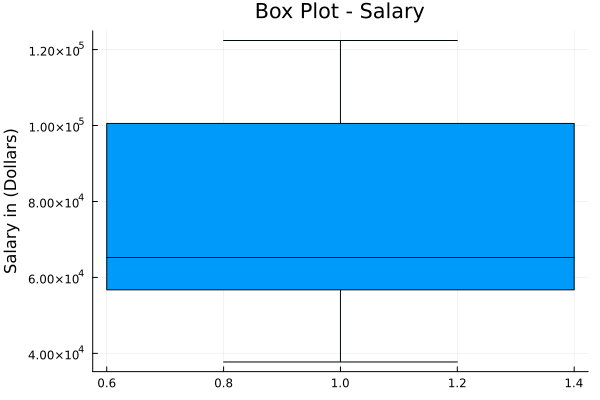

In [16]:
# Box Plot
boxplot(
    df.Salary,
    title = "Box Plot - Salary",
    ylabel = "Salary in (Dollars)",
    legend = false
)

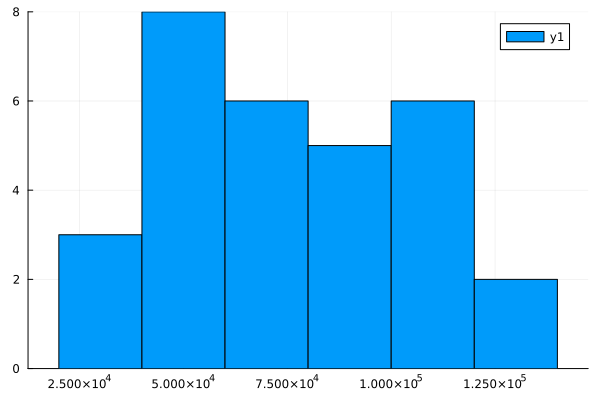

In [17]:
histogram(df.Salary)

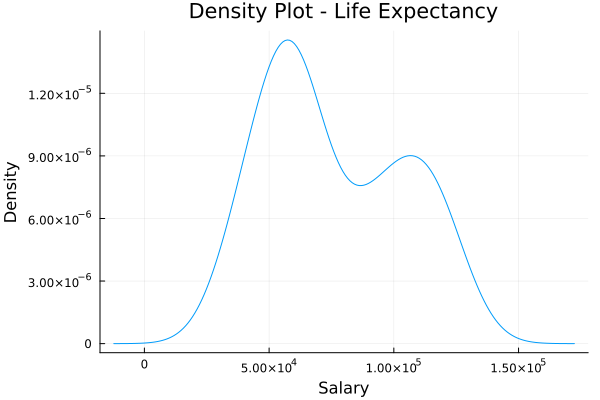

In [20]:
# Density Plot
density(df.Salary , 
    title = "Density Plot - Life Expectancy",
    ylabel = "Density", 
    xlabel = "Salary",
    legend = false
)

### Correlation Analysis Using Scatter Plot

In [27]:
# Correlation Analysis
println("Correlation of Life Expectancy with Adult Mortality Rate is: ",
    cor(df.Salary, df.YearsExperience),"\n\n")

Correlation of Life Expectancy with Adult Mortality Rate is: 0.9782416184887598




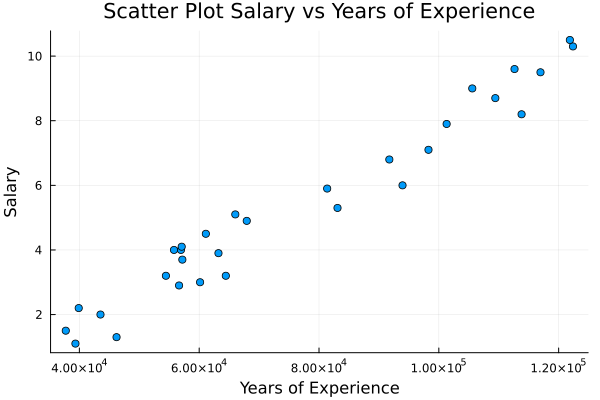

In [31]:
# Scatter plot
train_plot = scatter(df.Salary,
    df.YearsExperience,
    title = "Scatter Plot Salary vs Years of Experience",
    ylabel = "Salary", 
    xlabel = "Years of Experience",
    legend = false
)

In [10]:

# Assuming df has columns: "YearsExperience" and "Salary"
lm_model = lm(@formula(Salary ~ YearsExperience), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Salary ~ 1 + YearsExperience

Coefficients:
────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)      25792.2     2273.05   11.35    <1e-11   21136.1     30448.3
YearsExperience   9449.96     378.755  24.95    <1e-19    8674.12    10225.8
────────────────────────────────────────────────────────────────────────────

In [9]:
println(coef(lm_model))
println(deviance(lm_model))

[25792.200198668772, 9449.962321455063]
9.381285516684289e8


In [15]:
lm_model.model

LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}:

Coefficients:
───────────────────────────────────────────────────────────────
       Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────
x1  25792.2     2273.05   11.35    <1e-11   21136.1     30448.3
x2   9449.96     378.755  24.95    <1e-19    8674.12    10225.8
───────────────────────────────────────────────────────────────


In [17]:
println(coef(lm_model))


[25792.200198668772, 9449.962321455063]
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}


In [19]:
summary(lm_model)

"StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}"

In [33]:
using ScikitLearn

In [34]:
using ScikitLearn
@sk_import linear_model: LinearRegression

PyObject <class 'sklearn.linear_model._base.LinearRegression'>

In [29]:
using ScikitLearn.CrossValidation: train_test_split

X = df[!, "YearsExperience"]
y = df[!, "Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4-element Vector{Vector{Float64}}:
 [10.3, 8.7, 4.0, 1.1, 2.2, 5.1, 2.9, 4.1, 4.0, 7.9  …  7.1, 9.5, 5.9, 10.5, 6.8, 3.2, 3.9, 4.5, 6.0, 3.0]
 [9.6, 4.9, 8.2, 5.3, 3.2, 3.7]
 [122391.0, 109431.0, 56957.0, 39343.0, 39891.0, 66029.0, 56642.0, 57081.0, 55794.0, 101302.0  …  98273.0, 116969.0, 81363.0, 121872.0, 91738.0, 54445.0, 63218.0, 61111.0, 93940.0, 60150.0]
 [112635.0, 67938.0, 113812.0, 83088.0, 64445.0, 57189.0]

In [31]:
model = LinearRegression()
ScikitLearn: fit!(model, X_train, y_train)

LoadError: UndefVarError: `fit!` not defined

In [ ]:
y_pred = predict(model, X_test)

# To evaluate the model, you might calculate metrics like MSE or R-squared manually
# For example, using mean squared error:
mse = mean((y_test - y_pred).^2)
println("Mean Squared Error: ", mse)

#### Train Test Split

In [33]:
# Train test split
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(df,.80);

In [36]:
println(size(train))
print(size(test))

(23, 2)
(7, 2)

In [37]:
first(train, 5)

,YearsExperience,Salary
,Float64,Float64
1,1.1,39343.0
2,1.3,46205.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0


## Model Training 

In [39]:
# Construct a formula
fm = @formula(Salary ~ YearsExperience)

FormulaTerm
Response:
  Salary(unknown)
Predictors:
  YearsExperience(unknown)

In [51]:
# Train (fit) the model
linearRegressor = lm(fm, train);

In [52]:
println(linearRegressor)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Salary ~ 1 + YearsExperience

Coefficients:
────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)      27760.5     2447.01   11.34    <1e-09   22671.7     32849.3
YearsExperience   9227.93     400.289  23.05    <1e-15    8395.48    10060.4
────────────────────────────────────────────────────────────────────────────


## Model Evaluation

1. Mean Aboslute Error
2. Mean Absolute Percentage Error
3. Root Mean Square Error
4. Mean Squared Error
5. Error Distribution


Let’s create the performance metrics. I would be looking at the performance metrics for both train data as well as test data.
Now that the model is ready, let’s predict on both the training and test data and cmopute squared errors.

In [109]:
# MAPE function defintion
function mape_metric(performance_df)
    mape = mean(abs.(performance_df.error./performance_df.y_actual))
    return mape
end

# RMSE function definition
function rmse_metric(performance_df)
    rmse = sqrt(mean(performance_df.error.*performance_df.error))
    return rmse
end;

In [57]:
# Prediction
ypredicted_test = GLM.predict(linearRegressor, test);
ypredicted_train =GLM.predict(linearRegressor, train);

In [59]:
# Test Performance DataFrame (compute squared error)
performance_testdf = DataFrame(
    y_actual = test[!,:Salary],
    y_predicted = ypredicted_test
);

In [60]:
performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
performance_testdf.error_sq = performance_testdf.error.*performance_testdf.error

7-element Vector{Float64}:
 1.4987565431870142e7
 8.093197858707753e6
 7.882237672574767e7
 6.683324923385084e7
 2.539486236958484e7
 1.0779645985111682e8
 2.7351170767042316e7

In [130]:
# Train Performance DataFrame (compute squared error)
performance_traindf = DataFrame(
    y_actual = train[!,:Salary],
    y_predicted = ypredicted_train
);

performance_traindf.error = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted]
performance_traindf.error_sq = performance_traindf.error.*performance_traindf.error ;

In [129]:
# Performance Test Metrics  
println("-" ^ 63)
@printf("%-40s %s %s\n", "Mean Absolute test error", ":", mean(abs.(performance_testdf.error)))
@printf("%-40s %s %s\n", "Mean Absolute Percentage test error", ":", mape_metric(performance_testdf))
@printf("%-40s %s %s\n", "Root mean square test error",":", rmse_metric(performance_testdf))
@printf("%-40s %s %s\n", "Mean square test error", ":", mean(performance_testdf.error_sq))
println("-" ^ 63)

---------------------------------------------------------------
Mean Absolute test error                 : 6345.894738391346
Mean Absolute Percentage test error      : 0.0946700965191989
Root mean square test error              : 6858.559638852965
Mean square test error                   : 4.7039840319702916e7
---------------------------------------------------------------


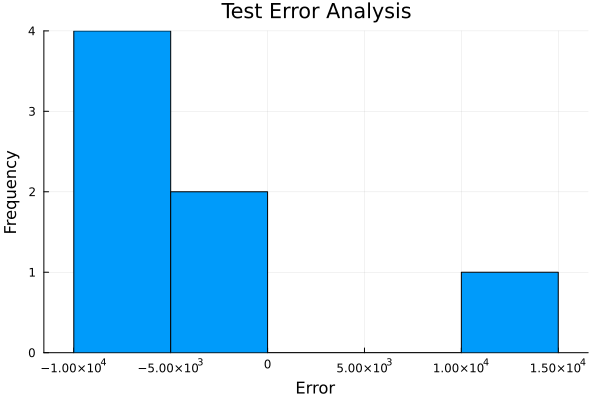

In [71]:
# Histogram of error to see if it's normally distributed on test dataset
histogram(performance_testdf.error,
    title = "Test Error Analysis",
    ylabel = "Frequency", 
    xlabel = "Error",
    legend = false)

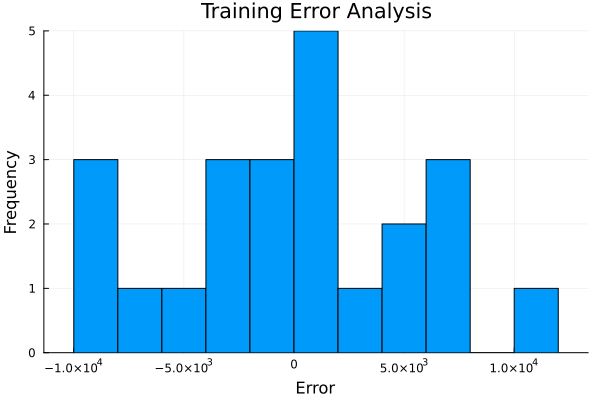

In [73]:
# Histogram of error to see if it's normally distributed  on train dataset
histogram(performance_traindf.error,
    bins=15, 
    title = "Training Error Analysis",
    ylabel = "Frequency",
    xlabel = "Error",
    legend = false)

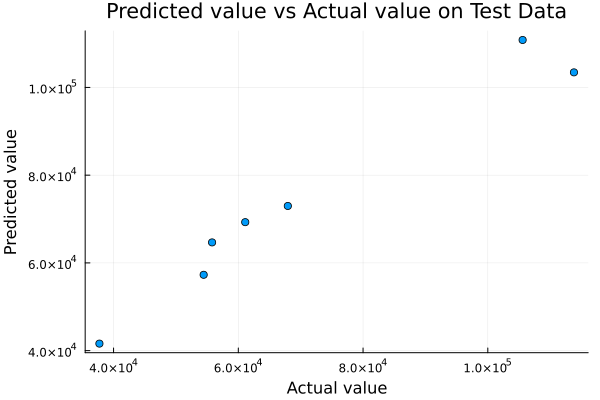

In [131]:
# Scatter plot of actual vs predicted values on test dataset
test_plot = scatter(
    performance_testdf[!,:y_actual],
    performance_testdf[!,:y_predicted],
    title = "Predicted value vs Actual value on Test Data",
    ylabel = "Predicted value",
    xlabel = "Actual value",
    legend = false
)

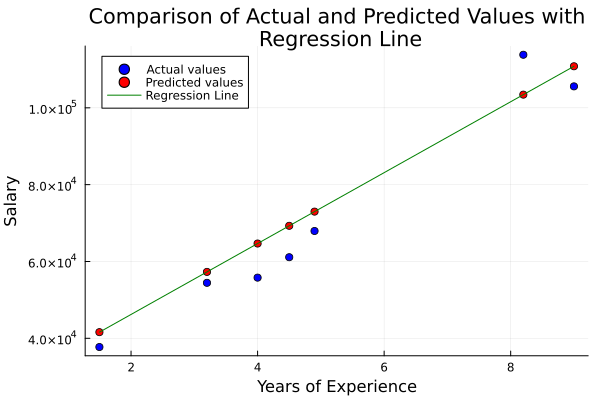

In [147]:
# Scatter plot for actual vs. predicted values
X_test = test[!,:YearsExperience] 
y_test = test[!,:Salary]

scatter(X_test, y_test, color=:blue, label="Actual values")
scatter!(X_test, ypredicted_test, color=:red, label="Predicted values")

# Adding regression line
# Sort the values of X_test for a continuous line
sorted_order = sortperm(vec(X_test))
plot!(X_test[sorted_order], ypredicted_test[sorted_order], color=:green, label="Regression Line")

title!("Comparison of Actual and Predicted Values with\n Regression Line")
xlabel!("Years of Experience")
ylabel!("Salary")

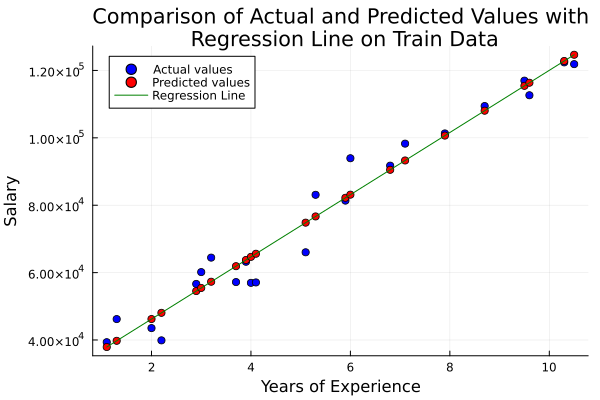

In [166]:
# Extracting features and target values from the train data
X_train = train[!,:YearsExperience] 
y_train = train[!,:Salary]

# Scatter plot for actual vs. predicted values on training data
scatter(X_train, y_train, color=:blue, label="Actual values")
scatter!(X_train, ypredicted_train, color=:red, label="Predicted values")

# Adding regression line
# Sort the values of X_train for a continuous line
sorted_order = sortperm(vec(X_train))
plot!(X_train[sorted_order], ypredicted_train[sorted_order], color=:green, label="Regression Line")

title!("Comparison of Actual and Predicted Values with\n Regression Line on Train Data")
xlabel!("Years of Experience")
ylabel!("Salary")

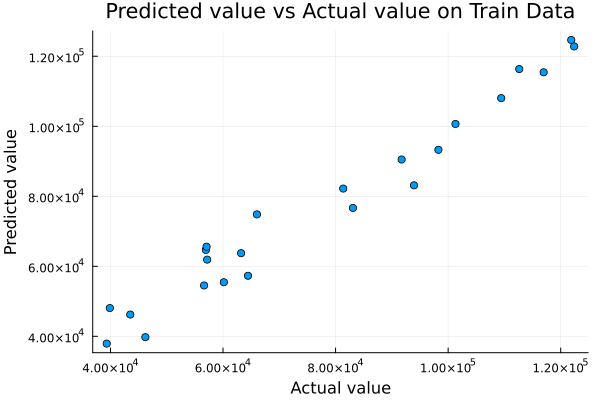

In [167]:
# Scatter plot of actual vs predicted values on train dataset
train_plot = scatter(
    performance_traindf[!,:y_actual],
    performance_traindf[!,:y_predicted],
    title = "Predicted value vs Actual value on Train Data",
    ylabel = "Predicted value",
    xlabel = "Actual value",
    legend = false
)


## Cross Validation

- Cross Validation is a statistical method primarily used to assess how the results of a statistical analysis will generalize to an independent data set. In essence, it involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or testing set).

- To reduce variability, multiple rounds of cross-validation are performed using different partitions, and the validation results are averaged over the rounds.

- One of the most common methods is K-Fold Cross Validation, where the data set is divided into 'k' subsets, and the holdout method is repeated 'k' times. Each time, one of the 'k' subsets is used as the test set and the other 'k-1' subsets are put together to form a training set. Then, the average error across all 'k' trials is computed. This method is valuable in that it both trains and validates the model on all available data, providing a robust indication of the model's performance.

In [213]:
function cross_validation(train, k, fm = @formula(Salary ~ YearsExperience))
    a = collect(Kfold(size(train, 1), k))
    scores = Float64[]  # Initialize an empty array to store scores

    for i in 1:k
        row = a[i]
        temp_train = train[row, :]
        temp_test = train[setdiff(1:end, row), :]
        linearRegressor = lm(fm, temp_train)
        performance_testdf = DataFrame(y_actual = temp_test[!,:Salary], y_predicted = GLM.predict(linearRegressor, temp_test))
        performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]

        mean_error = mean(abs.(performance_testdf.error))
        # println("Mean error for set $i is ", mean_error)
        push!(scores, mean_error)  
    end

    return scores;
end

function plot_scores(scores)
    plot(1:length(scores), scores, title="Cross-Validation Scores", xlabel="Fold", ylabel="Mean Error", legend=false, markershape=:circle, linewidth=2, color=:blue)
end;

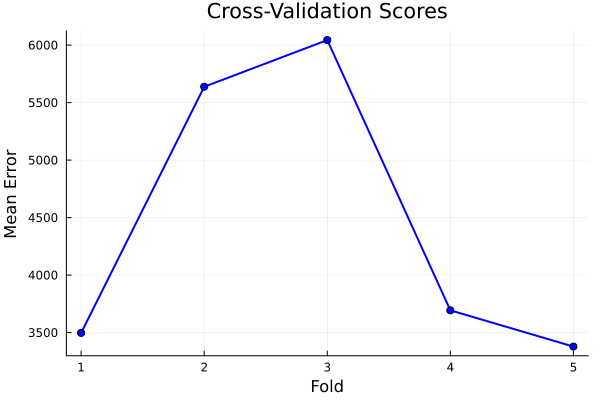

In [215]:
scores = cross_validation(train, 5);
plot_scores(scores)

### References 

1. [Linear Regression in Julia](https://www.machinelearningplus.com/linear-regression-in-julia/)
2. [The Complete Linear Regression Introduction](https://www.machinelearningplus.com/machine-learning/complete-introduction-linear-regression-r/)
3. [MLJBase Documentation](https://docs.juliahub.com/MLJBase/jaWQl/0.14.8/measures/#MLJBase.mape)